<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/cat_vs_dogs_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,MaxPool2D, Conv2D,BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import zipfile

# Path to your zip file
zip_path = "/content/newajay.zip"

# Open the zip file
zip_ref= zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
val_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalized**

In [9]:
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

In [10]:
# Apply your process function
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)


In [20]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [23]:
history=model.fit(train_ds,epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 93ms/step - accuracy: 0.5785 - loss: 2.3151 - val_accuracy: 0.6860 - val_loss: 0.5866
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.7152 - loss: 0.5619 - val_accuracy: 0.7714 - val_loss: 0.4754
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.7763 - loss: 0.4749 - val_accuracy: 0.7938 - val_loss: 0.4447
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.8118 - loss: 0.4149 - val_accuracy: 0.7856 - val_loss: 0.4459
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.8426 - loss: 0.3538 - val_accuracy: 0.7846 - val_loss: 0.4900
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8808 - loss: 0.2841 - val_accuracy: 0.8058 - val_loss: 0.4342
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9101 - loss: 0.2170 - val_accuracy: 0.7078 - val_loss: 1.1359
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9392 - loss: 0.1553 

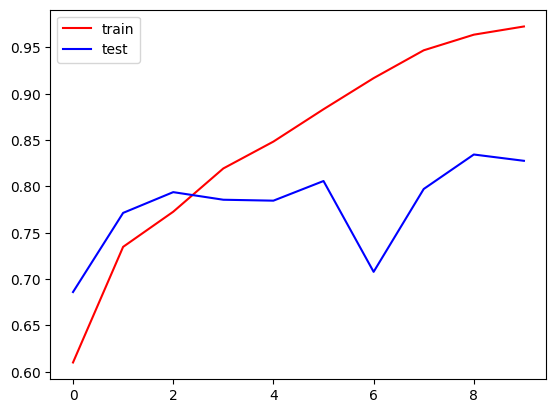

In [29]:
plt.plot(history.history['accuracy'], color='red', label="train")
plt.plot(history.history['val_accuracy'], color='blue', label="test")
plt.legend()

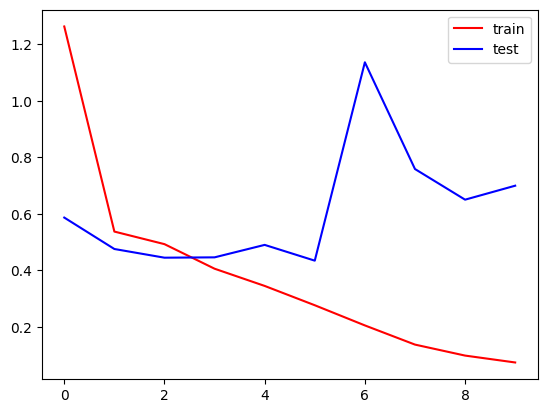

In [30]:
plt.plot(history.history['loss'], color='red', label="train")
plt.plot(history.history['val_loss'], color='blue', label="test")
plt.legend()

In [61]:
import cv2

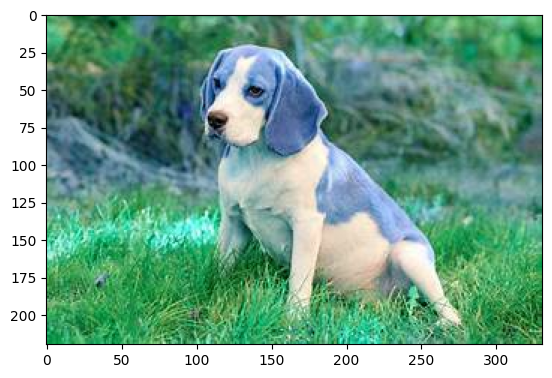

In [62]:
test_img=cv2.imread("/content/jahgriti.jpeg")

plt.imshow(test_img)

In [63]:
test_img.shape

(220, 331, 3)

In [64]:
test_img=cv2.resize(test_img,(256,256))

In [65]:
test_input=test_img.reshape(1,256,256,3)

In [66]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

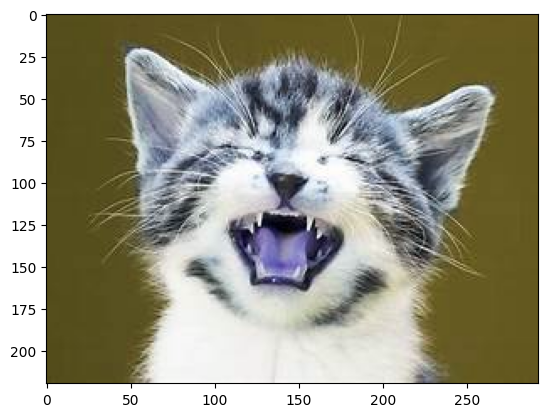

In [67]:
test_img=cv2.imread("/content/catds1.jpeg")

plt.imshow(test_img)


In [68]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)


In [70]:
test=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [75]:
if test[0][0]==1.0:
  print("Dog")
else:
  print("cat")


Dog
